Chia-Wei Lai | clai2
<h3><center>Simulation Methods</center></h3>
<h3><center>46-773</center></h3>
<h3><center>Homework #2</center></h3>

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
import random

1) **Practice on the rejection method (From homework #1)**

Using the rejection method, show how to generate exact standard normal random variables using standard Cauchy random varables and the rejection method. On average how many Cauchy random variables are needed to generate 10,000 standard normals?

In [2]:
# -c (float): scaling constant for the proposal distribution.
c = np.sqrt(2 * np.pi) * np.exp(- 0.5)
n = int(c * 10000)

u1 = np.random.uniform(0, 1, size = n)
x = np.tan(np.pi * (u1 - 0.5))

# g(x) function
acceptance_prob = (np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)) / (c / (np.pi * (1 + x**2)))

In [3]:
print(c)

1.5203469010662807


In [4]:
u2 = np.random.uniform(0, 1, size = n)
idx = u2 < acceptance_prob
x[idx].shape
y = x[idx]

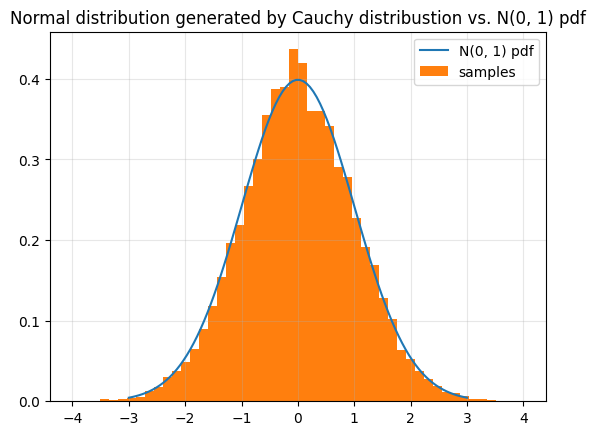

In [5]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
z = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

plt.plot(z, stats.norm.pdf(z, mu, sigma))
plt.hist(y, bins=50, range = (-4, 4), density = True)

plt.grid(alpha = 0.3)
plt.title('Normal distribution generated by Cauchy distribustion vs. N(0, 1) pdf')
plt.legend(['N(0, 1) pdf', 'samples'])

By Rejection Method Theorem, An $X_{sim}$ returned by the Rejection Method Algorithm above has distribution $F_X(x)$, and the probability a pair $(U_1, U_2)$ produce an accepted $X_{sim} = Y$ is $1/C$. Therefore, on average we need $c * n = 1.52 * 10000$ Cauchy random variables to generate 10,000 standard normals.

In [6]:
# Jarque-Bera test Chi^2 two-tail prob
sms.jarque_bera(y)[1]

0.4272939870663507

2) **Practice on the Cholesky decomposition**
Consider the following covariance matrices

a)

$$
\begin{bmatrix}
1 & \rho & \rho^2\\ 
\rho & 1 & \rho \\ 
\rho^2 & \rho & 1
\end{bmatrix}
$$

b)

$$
\begin{bmatrix}
1 & \rho & \rho^2 & \rho^3\\ 
\rho & 1 & \rho & \rho^2\\ 
\rho^2 & \rho & 1 & \rho\\
\rho^3 & \rho^2 & \rho & 1
\end{bmatrix}
$$


Find the Cholesky decomposition for both of these (which are generalizations of the autoregressive process example given in class. Taking together the answer for the 2x2 case derived in class and your answer for the 3x3 and 4x4 cases above, can you conjecture what the general result for the autoregressive process for general n?

We have the formual as follows:

$$
l_{ki}=\frac{a_{ki}-\sum_{j=i}^{i-1}l_{ij}l_{kj}}{l_{ii}} \quad; \quad l_{kk} = \sqrt{a_{kk}-\sum_{j=1}^{k-1}l_{kj}^2}
$$

Step-by-Step Solution for (a)

Given the symmetric 3x3 matrix:

$$
A = 
\begin{bmatrix}
1 & \rho & \rho^2\\ 
\rho & 1 & \rho \\ 
\rho^2 & \rho & 1
\end{bmatrix}
$$

we will find a lower triangular matrix $L$ such that:

$$
L = AA^T
$$

Assume $L$ has the form:

$$
L = 
\begin{bmatrix}
l_{11} & 0 & 0\\ 
l_{21}  & l_{22}  & 0 \\ 
l_{31}  & l_{32}  & l_{33} 
\end{bmatrix}
$$

Now, calculate the entries of $L$:

$$
\begin{align*}
l_{11} &= \sqrt{a_{11}}=1, \\
l_{21} &= \frac{a_{21}}{l_{11}}=\rho, \\
l_{22} &= \sqrt{a_{22}-\sum_{j=1}^1 l_{2j}^2} = \sqrt{1-\rho^2}, \\
l_{31} & = \frac{a_{31}}{l_{11}} = \rho^2, \\
l_{32} & = \frac{a_{32}-\sum_{j=1}^1 l_{2j}l_{3j}}{l_{22}} = \frac{\rho - \rho^3}{\sqrt{1-\rho^2}}, \\
l_{33} & = \sqrt{a_{33}-\sum_{j=1}^2 l_{3j}^2} = \sqrt{1-\rho^4-\frac{(\rho-\rho^3)^2}{1-\rho^2}}
\\
\\
\Rightarrow 
L = 
\begin{bmatrix}
l_{11} & 0 & 0\\ 
l_{21}  & l_{22}  & 0 \\ 
l_{31}  & l_{32}  & l_{33} 
\end{bmatrix}

&=\begin{bmatrix}
1 & 0 & 0\\ 
\rho  & \sqrt{1-\rho^2}  & 0 \\ 
\rho^2  & \frac{\rho - \rho^3}{\sqrt{1-\rho^2}}  & \sqrt{1-\rho^4-\frac{(\rho-\rho^3)^2}{1-\rho^2}}
\end{bmatrix}
\end{align*} 

$$

Step-by-Step Solution for (b)

$$
A=
\begin{bmatrix}
1 & \rho & \rho^2 & \rho^3\\ 
\rho & 1 & \rho & \rho^2\\ 
\rho^2 & \rho & 1 & \rho\\
\rho^3 & \rho^2 & \rho & 1
\end{bmatrix}
$$

Assume $L$ has the form:

$$
L = 
\begin{bmatrix}
l_{11} & 0 & 0 & 0\\ 
l_{21}  & l_{22}  & 0 & 0\\ 
l_{31}  & l_{32}  & l_{33} & 0 \\
l_{41}  & l_{42}  & l_{43} & l_{44} \\
\end{bmatrix}
$$

Now, calculate the entries of $L$:

$$
\begin{align*}
l_{11} &= \sqrt{a_{11}}=1, \\
l_{21} &= \frac{a_{21}}{l_{11}}=\rho, \\
l_{22} &= \sqrt{a_{22}-\sum_{j=1}^1 l_{2j}^2} = \sqrt{1-\rho^2}, \\
l_{31} & = \frac{a_{31}}{l_{11}} = \rho^2, \\
l_{32} & = \frac{a_{32}-\sum_{j=1}^1 l_{2j}l_{3j}}{l_{22}} = \frac{\rho - \rho^3}{\sqrt{1-\rho^2}}, \\
l_{33} & = \sqrt{a_{33}-\sum_{j=1}^2 l_{3j}^2} = \sqrt{1-\rho^4-\frac{(\rho-\rho^3)^2}{1-\rho^2}}, \\
l_{41} & = \frac{a_{41}}{l_{11}}=\rho^3, \\
l_{42} & = \frac{a_{42}-\sum_{j=1}^1 l_{2j}l_{4j}}{l_{22}} = \frac{\rho^2-\rho^4}{\sqrt{1-\rho^2}}, \\
l_{43} & = \frac{a_{43}-\sum_{j=1}^2 l_{3j}l_{4j}}{l_{33}} = \frac{\rho-\rho^3}{\sqrt{1-\rho^4-\frac{(\rho-\rho^3)^2}{1-\rho^2}}}, \\
l_{44} & = \sqrt{a_{44}-\sum_{j=1}^3 l_{4j}^2} = \sqrt{1-\rho^6-\frac{\rho^4(1-\rho^2)^2}{1-\rho^2}-l_{43}^2}

\\
\\
\Rightarrow 
L = 
\begin{bmatrix}
l_{11} & 0 & 0 & 0\\ 
l_{21}  & l_{22}  & 0 & 0\\ 
l_{31}  & l_{32}  & l_{33} & 0 \\
l_{41}  & l_{42}  & l_{43} & l_{44}
\end{bmatrix}

&=\begin{bmatrix}
1 & 0 & 0 & 0\\ 
\rho  & \sqrt{1-\rho^2}  & 0 & 0\\ 
\rho^2  & \frac{\rho - \rho^3}{\sqrt{1-\rho^2}}  & \sqrt{1-\rho^4-\frac{(\rho-\rho^3)^2}{1-\rho^2}} & 0\\
\rho^3 & \frac{\rho^2-\rho^4}{\sqrt{1-\rho^2}} & \frac{\rho-\rho^3}{\sqrt{1-\rho^4-\frac{(\rho-\rho^3)^2}{1-\rho^2}}} & \sqrt{1-\rho^6-\frac{\rho^4(1-\rho^2)^2}{1-\rho^2}-l_{43}^2}
\end{bmatrix}

\end{align*} 
$$

3) **Studying the Quality of Various Normal Generation Methods (continued).**

Using the Python and matplotlib generate three different sets of observations (n = 100 and n = 1,000) designed to have a standard normal distribution using the methods listed below, and present a Q-Q (normal) plot for each. Comment on the quality of the methods based on your normal plots.

(a) The rejection method based on the unit exponential distribution presented in class.

(b) The generalized lambda distribution (see page 31 of the Course Notes) with $\lambda_1 = 0$, $\lambda_2 = 0.1975$, $\lambda_3 = \lambda_4 = 0.1349.$

(c) The Litterman-Winkelmanm weighted normal distribution described on page 30 of the Course Notes.



In [7]:
#for (a)
n1, n2, n3 = 100, 1000, 10000

def rj_method_based_on_exponential_dis(n):
    c = np.sqrt(2 * np.exp(1) / np.pi)
    _n = int(c * n)

    u1 = np.random.uniform(0, 1, size = _n)
    x = - np.log(u1) * (2 * np.random.randint(0,2,size=(_n))-1)

    acceptance_prob= (np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)) / (c * 0.5 * np.exp(- abs(x)))

    u2 = np.random.uniform(0, 1, size = _n)
    idx = u2 < acceptance_prob
    x[idx].shape
    y = x[idx]

    return y

(a) The rejection method based on the unit exponential distribution


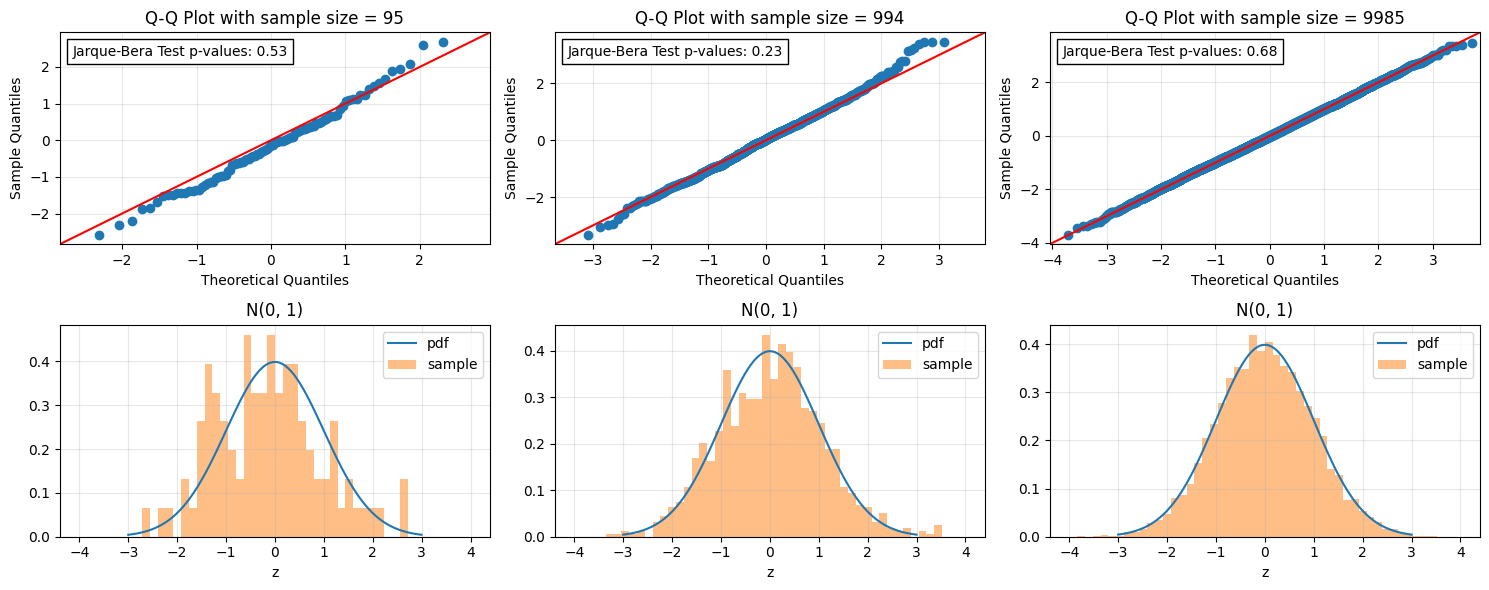

In [8]:
from matplotlib.offsetbox import AnchoredText

mu = 0
variance = 1
sigma = np.sqrt(variance)
z = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
print('(a) The rejection method based on the unit exponential distribution')

# Create a Q-Q plot
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
# Jarque-Bera test Chi^2 two-tail prob
y = rj_method_based_on_exponential_dis(n1)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,0])
axes[0,0].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,0].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,0].add_artist(anchored_text)

axes[1,0].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,0].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,0].grid(alpha = 0.3)
axes[1,0].set_xlabel('z')
axes[1,0].set_title('N(0, 1)')
axes[1,0].legend(['pdf', 'sample'])
# --------------------------------------------------
# Jarque-Bera test Chi^2 two-tail prob
y = rj_method_based_on_exponential_dis(n2)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,1])
axes[0,1].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,1].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,1].add_artist(anchored_text)

axes[1,1].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,1].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,1].grid(alpha = 0.3)
axes[1,1].set_xlabel('z')
axes[1,1].set_title('N(0, 1)')
axes[1,1].legend(['pdf', 'sample'])
# --------------------------------------------------
# Jarque-Bera test Chi^2 two-tail prob
y = rj_method_based_on_exponential_dis(n3)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,2])
axes[0,2].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,2].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,2].add_artist(anchored_text)

axes[1,2].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,2].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,2].grid(alpha = 0.3)
axes[1,2].set_xlabel('z')
axes[1,2].set_title('N(0, 1)')
axes[1,2].legend(['pdf', 'sample'])
plt.tight_layout()

In [9]:
jbts = []
N = 1000
for i in range(N):

    y = rj_method_based_on_exponential_dis(n1)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt1 = sms.jarque_bera(y)[1]

    y = rj_method_based_on_exponential_dis(n2)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt2 = sms.jarque_bera(y)[1]

    y = rj_method_based_on_exponential_dis(n3)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt3 = sms.jarque_bera(y)[1]

    jbts.append([jbt1, jbt2, jbt3])

table = pd.DataFrame(jbts, columns=[f"size = {n1}", f"size = {n2}", f"size = {n3}"]) 
print('Percentage of accepting null hypothesis: pass normality test')
(table > 0.05).mean()


Percentage of accepting null hypothesis: pass normality test


size = 100      0.959
size = 1000     0.964
size = 10000    0.954
dtype: float64

In [10]:
# for (b)
n = 1000
def generalized_lambda_distribution_for_normal(n):
    lambda1, lambda2, lambda3, lambda4 = 0, 0.1975, 0.1349, 0.1349
    u1 = np.random.uniform(0, 1, size = n)
    return  lambda1 + (u1 ** lambda3 - (1 - u1) ** lambda4) / lambda2

(b) The generalized lambda distribution


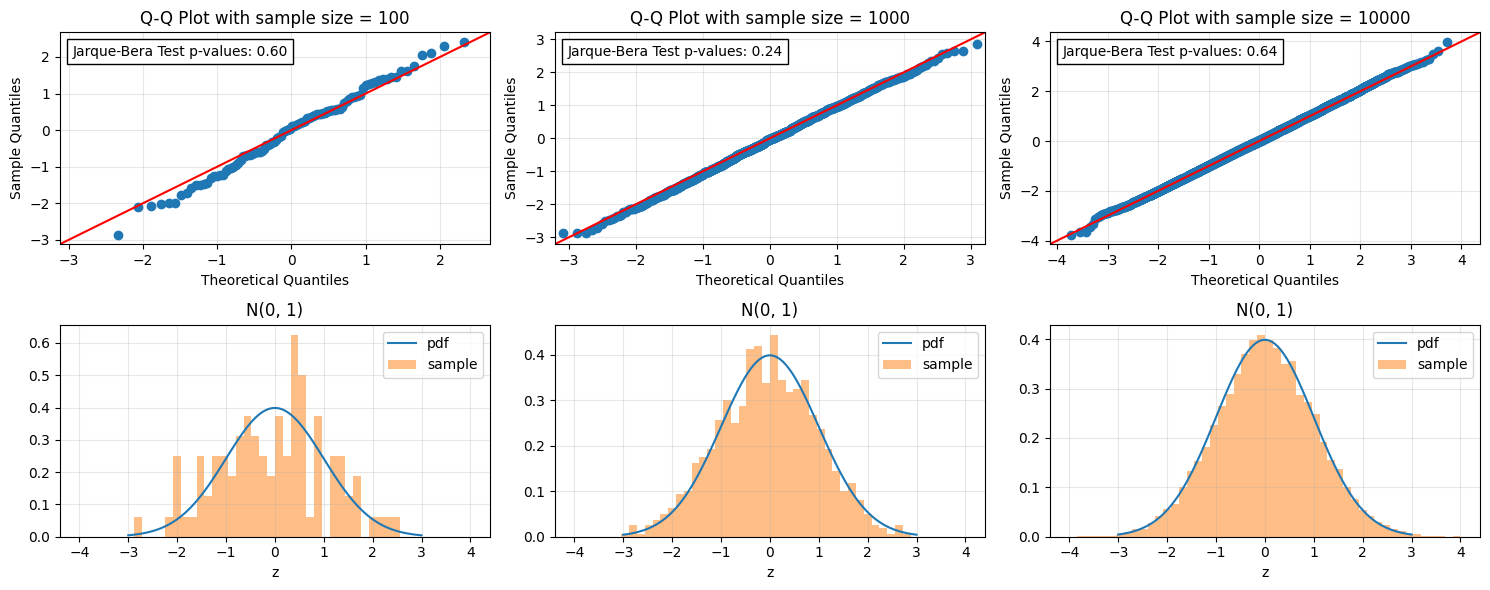

In [11]:
from matplotlib.offsetbox import AnchoredText

mu = 0
variance = 1
sigma = np.sqrt(variance)
z = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
print('(b) The generalized lambda distribution')
# Create a Q-Q plot
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Jarque-Bera test Chi^2 two-tail prob
y = generalized_lambda_distribution_for_normal(n1)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,0])
axes[0,0].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,0].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,0].add_artist(anchored_text)

axes[1,0].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,0].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,0].grid(alpha = 0.3)
axes[1,0].set_xlabel('z')
axes[1,0].set_title('N(0, 1)')
axes[1,0].legend(['pdf', 'sample'])
# --------------------------------------------------
# Jarque-Bera test Chi^2 two-tail prob
y = generalized_lambda_distribution_for_normal(n2)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,1])
axes[0,1].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,1].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,1].add_artist(anchored_text)

axes[1,1].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,1].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,1].grid(alpha = 0.3)
axes[1,1].set_xlabel('z')
axes[1,1].set_title('N(0, 1)')
axes[1,1].legend(['pdf', 'sample'])
# --------------------------------------------------
# Jarque-Bera test Chi^2 two-tail prob
y = generalized_lambda_distribution_for_normal(n3)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,2])
axes[0,2].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,2].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,2].add_artist(anchored_text)

axes[1,2].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,2].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,2].grid(alpha = 0.3)
axes[1,2].set_xlabel('z')
axes[1,2].set_title('N(0, 1)')
axes[1,2].legend(['pdf', 'sample'])
plt.tight_layout()

In [12]:
jbts = []
N = 1000
for i in range(N):

    y = generalized_lambda_distribution_for_normal(n1)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt1 = sms.jarque_bera(y)[1]

    y = generalized_lambda_distribution_for_normal(n2)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt2 = sms.jarque_bera(y)[1]

    y = generalized_lambda_distribution_for_normal(n3)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt3 = sms.jarque_bera(y)[1]

    jbts.append([jbt1, jbt2, jbt3])

table = pd.DataFrame(jbts, columns=[f"size = {n1}", f"size = {n2}", f"size = {n3}"]) 
print('Percentage of accepting null hypothesis: pass normality test')
(table > 0.05).mean()


Percentage of accepting null hypothesis: pass normality test


size = 100      0.962
size = 1000     0.964
size = 10000    0.968
dtype: float64

In [13]:
# for (c)
def Litterman_Winkelmanm_weighted_normal_distribution(n):
    p, w1, w2 = 0.82, 0.6, 1.98
    x = np.random.normal(0 ,1, size = n)
    split = int(len(x) * p)
    x[:split] = w1 * x[:split]
    x[split:] = w2 * x[split:]

    return x

(c) The Litterman-Winkelmanm weighted normal distribution described


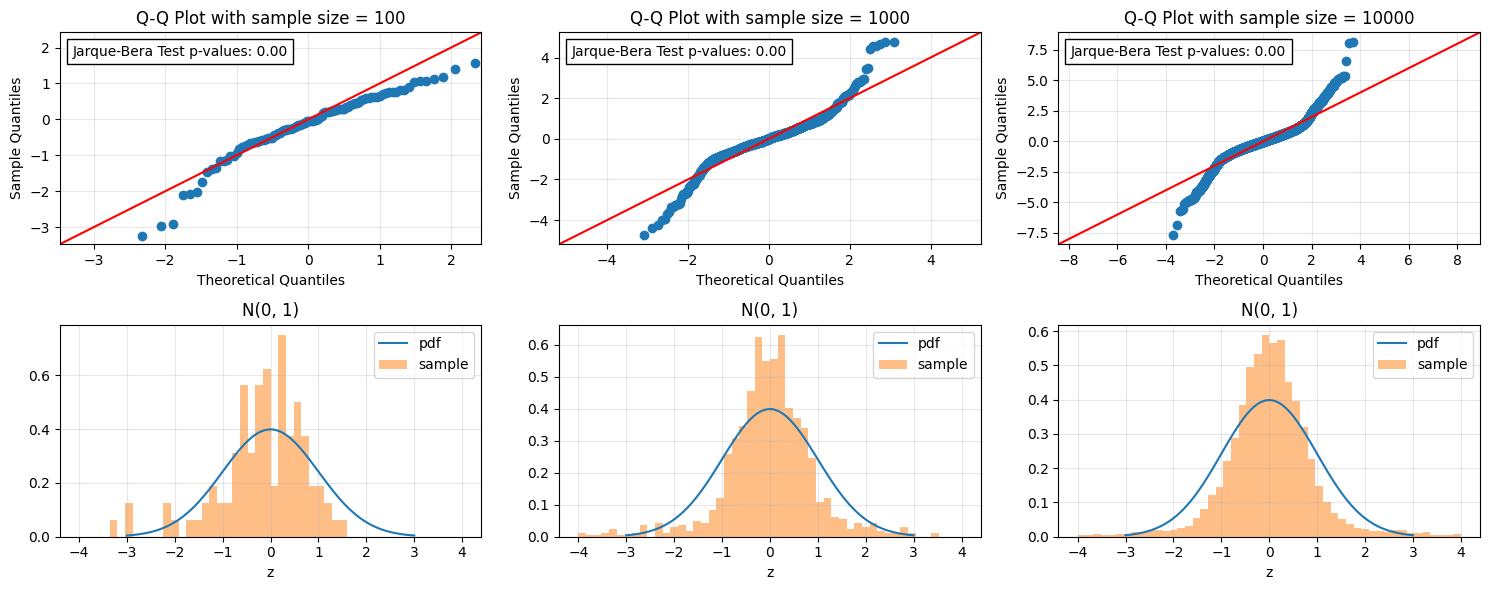

In [14]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
z = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
print('(c) The Litterman-Winkelmanm weighted normal distribution described')
# Create a Q-Q plot
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Jarque-Bera test Chi^2 two-tail prob
y = Litterman_Winkelmanm_weighted_normal_distribution(n1)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,0])
axes[0,0].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,0].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,0].add_artist(anchored_text)

axes[1,0].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,0].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,0].grid(alpha = 0.3)
axes[1,0].set_xlabel('z')
axes[1,0].set_title('N(0, 1)')
axes[1,0].legend(['pdf', 'sample'])
# --------------------------------------------------
# Jarque-Bera test Chi^2 two-tail prob
y = Litterman_Winkelmanm_weighted_normal_distribution(n2)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,1])
axes[0,1].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,1].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,1].add_artist(anchored_text)

axes[1,1].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,1].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,1].grid(alpha = 0.3)
axes[1,1].set_xlabel('z')
axes[1,1].set_title('N(0, 1)')
axes[1,1].legend(['pdf', 'sample'])
# --------------------------------------------------
# Jarque-Bera test Chi^2 two-tail prob
y = Litterman_Winkelmanm_weighted_normal_distribution(n3)
jbt = sms.jarque_bera(y)[1]

sm.qqplot(y, line ='45', ax=axes[0,2])
axes[0,2].set_title(f"Q-Q Plot with sample size = {len(y)}")
axes[0,2].grid(alpha = 0.3)
anchored_text = AnchoredText(f"Jarque-Bera Test p-values: {jbt:.2f}", loc=2)
axes[0,2].add_artist(anchored_text)

axes[1,2].plot(z, stats.norm.pdf(z, mu, sigma))
axes[1,2].hist(y, bins=50, range = (-4, 4), density = True, alpha = 0.5)
axes[1,2].grid(alpha = 0.3)
axes[1,2].set_xlabel('z')
axes[1,2].set_title('N(0, 1)')
axes[1,2].legend(['pdf', 'sample'])
plt.tight_layout()

In [15]:
jbts = []
N = 1000
for i in range(N):

    y = Litterman_Winkelmanm_weighted_normal_distribution(n1)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt1 = sms.jarque_bera(y)[1]

    y = Litterman_Winkelmanm_weighted_normal_distribution(n2)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt2 = sms.jarque_bera(y)[1]

    y = Litterman_Winkelmanm_weighted_normal_distribution(n3)
    # Jarque-Bera test Chi^2 two-tail prob
    jbt3 = sms.jarque_bera(y)[1]

    jbts.append([jbt1, jbt2, jbt3])

table = pd.DataFrame(jbts, columns=[f"size = {n1}", f"size = {n2}", f"size = {n3}"]) 
print('Percentage of accepting null hypothesis: pass normality test')
(table > 0.05).mean()


Percentage of accepting null hypothesis: pass normality test


size = 100      0.03
size = 1000     0.00
size = 10000    0.00
dtype: float64

Based on above results, (b) is a little bit better than (a) on average, and (c) generate heavy tail distribution so it's not normal.

4) **Practice on generating bivariate data and copulas**

(a) Generate 1,000 bivariate random variables from a standard bivariate-normal distribution with correlation 0 and 0.75. Show scatterplots of the data for each case and comment on the way in which those plots change as the correlation increases.

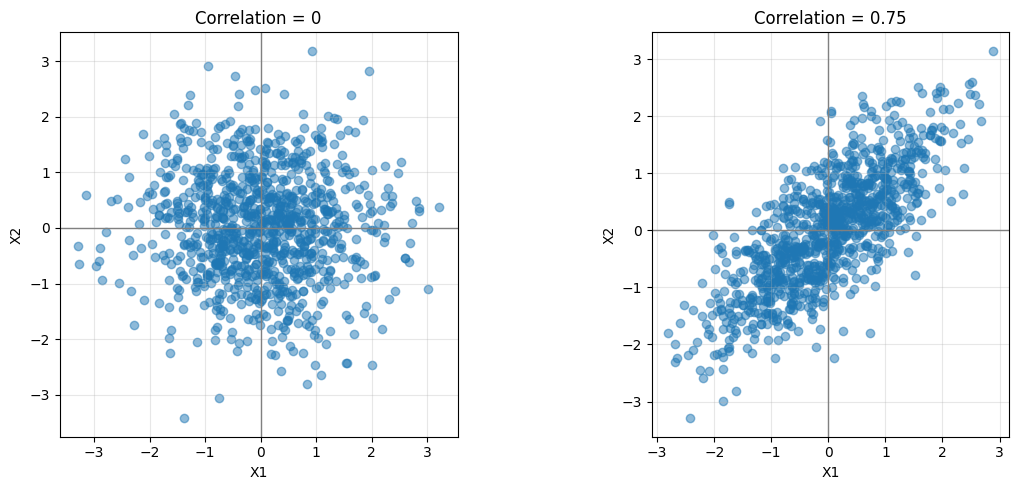

In [2]:
# Parameters
mean = [0, 0]  # Mean of each variable
correlations = [0, 0.75]  # List of correlations
covariances = np.array([[1, corr, corr, 1] for corr in correlations])  # Covariance matrices
samples = 1000  # Number of samples

# Generate random variables
data_sets = [np.random.multivariate_normal(mean, cov_matrix.reshape((2, 2)), samples) for cov_matrix in covariances]

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Correlation = 0', 'Correlation = 0.75']

for ax, data, title in zip(axes, data_sets, titles):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.set_aspect('equal')
    ax.grid(alpha = 0.3)

plt.tight_layout()
plt.show()


- **Correlation = 0:** The scatterplot shows that the variables are independent of each other, as indicated by the roughly circular shape of the point cloud. There's no apparent linear relationship between $X_1$ and $X_2$.
- **Correlation = 0.75:** In this plot, you can see a clear linear trend where $X_1$ and $X_2$ tend to increase together, reflecting the positive correlation. The points are more elongated along a line, suggesting a stronger linear relationship as compared to the first plot.

The visual change from a circular cloud to an elongated elliptical shape illustrates how the increase in correlation leads to a stronger and more evident linear relationship between the variables.

(b) Generate 1,000 bivariate random variables from a standard bivariate-t4 distribution with correla- tion 0 and 0.75. Show scatterplots of the data for each case and comment on the way in which those plots change as the correlation increases. Compare with the plots from the previous part of this problem.

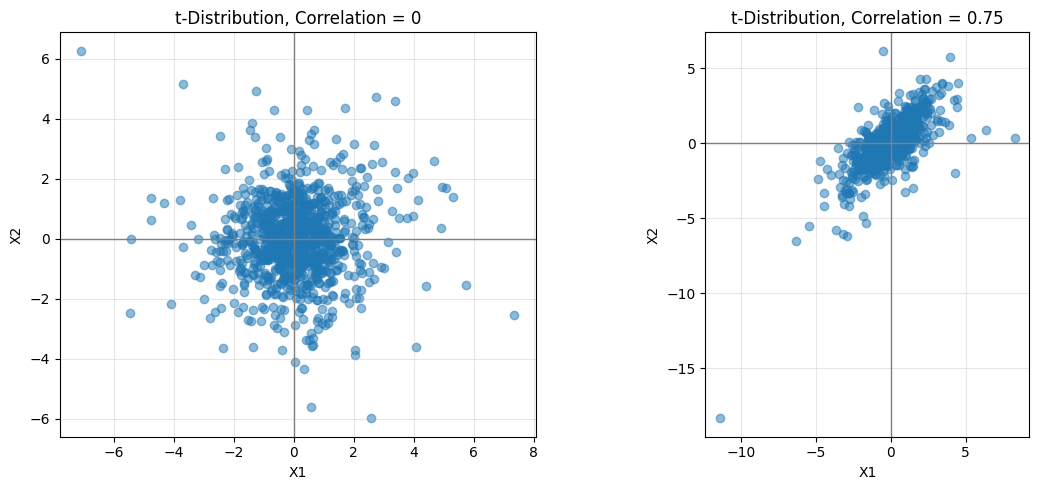

In [3]:
from scipy.stats import multivariate_t

# Parameters for the multivariate t-distribution
df = 4  # Degrees of freedom for the t-distribution

# Generate random variables from a bivariate t-distribution with specified correlations
data_sets_t = [multivariate_t.rvs(loc=mean, shape=np.array(cov).reshape((2, 2)), df=df, size=samples)
               for cov in covariances]

# Create scatter plots for the t-distribution data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['t-Distribution, Correlation = 0', 't-Distribution, Correlation = 0.75']

for ax, data, title in zip(axes, data_sets_t, titles):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.axhline(0, color='grey', lw=1)
    ax.axvline(0, color='grey', lw=1)
    ax.set_aspect('equal')
    ax.grid(alpha = 0.3)

plt.tight_layout()
plt.show()


- **t-Distribution, Correlation = 0:** This plot shows a more concentrated clustering around the center compared to the normal distribution, reflecting the heavier tails of the t-distribution. The points appear to spread out less extensively, showing no clear linear relationship between $X_1$ and $X_2$, which is expected with zero correlation.
- **t-Distribution, Correlation = 0.75:** Similar to the normal distribution with the same correlation, there's a visible linear trend where $X_1$ and $X_2$ increase together. However, the points are generally more spread out and less tightly clustered around the line compared to the normal distribution, again due to the heavier tails.


Comparison with Normal Distribution: The key difference between the scatterplots from the normal and t-distributions lies in the dispersion of the points. For the t-distribution, points tend to be more spread out, which can be attributed to the heavier tails, meaning more extreme values are more likely than in the normal distribution. The effect of the correlation is similar in both cases, but the spread due to the t-distribution's tails makes the linear relationship slightly less pronounced. 

(c) Generate 1,000 bivariate random variables each component of which has an exponential(1) marginal distribution using a standard Gaussian copula with correlation 0 and 0.75. Show scatterplots of the data for each case and comment on the way in which those plots change as the correlation increases.

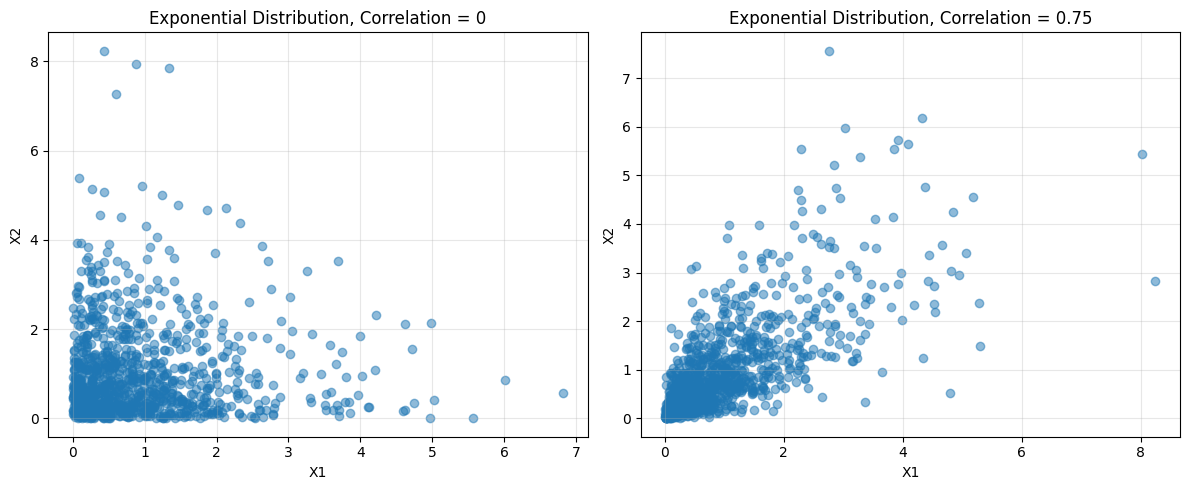

In [8]:
from scipy.stats import norm, expon

# Function to transform normal data to exponential using inverse transform sampling
def normal_to_exponential(data):
    return expon.ppf(norm.cdf(data))

# Generate bivariate normal data with specified correlations
data_normal = [np.random.multivariate_normal(mean, np.array(cov).reshape((2, 2)), samples) for cov in covariances]

# Transforming the normal data to exponential using the Gaussian copula approach
data_exponential = [normal_to_exponential(data) for data in data_normal]

# Create scatter plots for the exponential data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Exponential Distribution, Correlation = 0', 'Exponential Distribution, Correlation = 0.75']

for ax, data, title in zip(axes, data_exponential, titles):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_aspect('auto')
    ax.grid(alpha = 0.3)

plt.tight_layout()
plt.show()


In [9]:
np.corrcoef(data[:,0],data[:,1])

array([[1.        , 0.70069582],
       [0.70069582, 1.        ]])

- **Exponential Distribution, Correlation = 0:** This plot shows a cloud of points where each variable is exponentially distributed, with no apparent dependency between them, as expected from the zero correlation. The points are scattered mostly along the axes, which is typical for exponential distributions where values close to zero are more likely.

- **Exponential Distribution, Correlation = 0.75:** In this plot, despite the underlying exponential distribution of each variable, you can see a positive dependency structure imposed by the copula. As one variable increases, there's a higher likelihood that the other variable also increases, showing that the Gaussian copula effectively induces correlation between exponentially distributed variables.

- **Comment on the Change in Correlation:** As the correlation increases from 0 to 0.75, the scatterplots shift from a more scattered arrangement where each variable behaves independently, to a pattern where increases in one variable are likely to be accompanied by increases in the other. This effect is more subtle than with symmetrical distributions like the normal because the exponential distribution is skewed, with a clustering of values near zero and a long tail. The copula effectively creates a diagonal concentration of points, highlighting the imposed correlation.

(d) Generate 1,000 bivariate random variables each component of which has an exponential(1) marginal distribution using a standard t4 copula with correlation 0 and 0.75. Show scatterplots of the data for each case and comment on the way in which those plots change as the correlation increases. Compare with the scatterplots in the previous part of this problem.

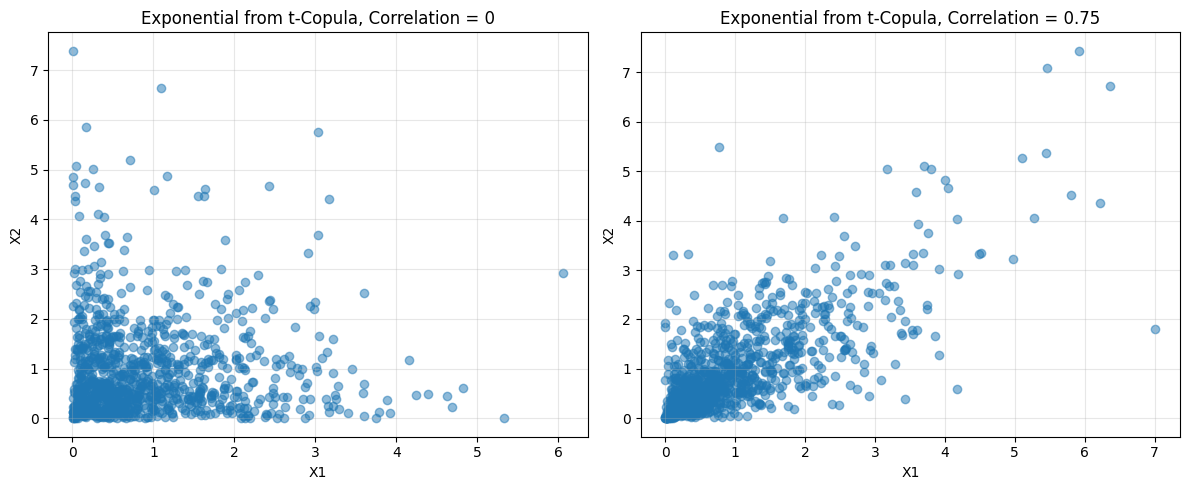

In [19]:
from scipy.stats import t

# Function to transform t-distributed data to exponential using inverse transform sampling
def t_to_exponential(data):
    return expon.ppf(t.cdf(data, df))

# Generate bivariate t-distributed data with specified correlations
data_t = [multivariate_t.rvs(loc=[0,0], shape=np.array(cov).reshape((2, 2)), df=df, size=samples) for cov in covariances]

# Transforming the t-distributed data to exponential using the t-copula approach
data_exponential_t = [t_to_exponential(data) for data in data_t]

# Create scatter plots for the exponential data transformed from t-distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
titles = ['Exponential from t-Copula, Correlation = 0', 'Exponential from t-Copula, Correlation = 0.75']

for ax, data, title in zip(axes, data_exponential_t, titles):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_aspect('auto')
    ax.grid(alpha = 0.3)

plt.tight_layout()
plt.show()


In [23]:
np.corrcoef(data[:,0],data[:,1])

array([[1.        , 0.73568969],
       [0.73568969, 1.        ]])

- **Exponential from t-Copula, Correlation = 0:** This plot shows the points widely spread out, but predominantly focused around the axes, reflecting the exponential distribution's skew towards smaller values. There is no clear correlation visible in this plot, which matches the theoretical expectation given a zero correlation setting.

- **Exponential from t-Copula, Correlation = 0.75:** Here, there is a noticeable trend where as one variable increases, the other tends to as well. This plot shows a stronger diagonal alignment compared to the Gaussian copula case, indicating that the t-copula with a heavier tail influence leads to a more pronounced correlation effect under the same coefficient.

**Comparison with Gaussian Copula:**

- The primary difference between the Gaussian and t-copula derived plots lies in the extent and nature of the spread of points. The t-copula plots exhibit more extreme joint occurrences (both variables being very high or very low together), which is a characteristic of the heavier tails of the t-distribution.

- While both copulas show a clear pattern of increased correlation in the 0.75 case, the t-copula result appears to stretch more towards the extremes, reflecting the copula's sensitivity to tail dependencies. This means in practical scenarios where extreme events are more crucial (like in finance or insurance), a t-copula might be more appropriate than a Gaussian copula for modeling dependencies with exponential marginals.

These insights illustrate how the choice of copula affects the joint behavior of the variables, especially under conditions of stress or extreme values.

##### Appendix: timestamp

In [20]:
from datetime import datetime

print(f"Generated on {datetime.now()}")

Generated on 2024-05-13 22:02:48.788944
